# Detección de Sexismo en Textos Ingleses

#### **Descripción del problema**

Hoy en dia, se ha vuelto cada vez más importante identificar y reducir el contenido sexista en redes sociales, dado que estas plataformas juegan un papel fundamental en la construcción de opiniones, creencias y comportamientos de sus usuarios. La persistencia de estereotipos y comentarios sexistas en redes sociales afecta de forma negativa tanto a mujeres como a hombres, y contribuye a la normalización de la desigualdad de género en la sociedad.
<br>

Conscientes de este impacto, muchas compañías detrás de las redes sociales están comenzando a tomar medidas preventivas, implementando políticas y herramientas que detecten y limiten contenido discriminatorio. En este contexto, el presente documento está alineado con la problemática de identificar el sexismo en los comentarios de redes sociales. Este proyecto busca detectar patrones de lenguaje sexista mediante el análisis de contenido textual, utilizando aprendizaje automático para reconocer actitudes y comportamientos sexistas.
<br>

La información obtenida mediante este análisis puede emplearse para diseñar proyectos preventivos.

<br>

Para lleva a cabo este trabajo, se hizo uso del siguiente dataset:

https://www.kaggle.com/datasets/aadyasingh55/sexism-detection-in-english-texts/data

<br>

En este trabajo se busca analizar los comentarios de redes sociales que son sexistas, los cuales se pueden clasificar en 4 categorias:



1.   Amenazas, planes para hacer daño e incitación.
2.   Derogación.
3.   Animosidad.
4.   Discusiones prejuiciosas.

Todos los comentarios son de personas de habla inglesa. En el dataset empleado hay 6 columnas para este conjunto de datos: rewire_id, texto, label_sexist,label_category, label_vector, split.

<br>

#### **Objetivos específicos:**

Implementar los modelos de aprendizaje de máquina: Regresión logistica, árboles de decisión,random forest, Perceptron. Realizar análisis y pruebas con el dataset suministrado de Kaggle. Aplicar ténicas de procesamiento al conjunto de datos.

<br>

#### **Variables del conjunto de datos**



1.   Identificador del comentario (columna "rewire_id"):

  *   Identificador único para cada entrada.

2.   texto (columna "text"):

  *   Contenido del texto en inglés para el análisis.

3. Sexista (columna "label_sexist"):

  *   Clasificación que indica si el texto es sexista.

4. Categoria (columna "label_category"):

  *  Indica la categoria del comentario sexista.

5.  Vectoizacion (columna "label_vector"):

  *  Representa una vectorización del texto.

6.  División (columna "split"):

  *  Indica la división del conjunto de datos. si es de entrenamiento o de prueba.

<br>

### **Librerias requeridas**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

!pip install unidecode

#Tratar los datos
import re
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from unidecode import unidecode

# Importación de librerías Arboles de decision
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Obtener el dataset desde kaggle
import kagglehub
import os

#descargar las palabras reservadas
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('punkt')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 14.9 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## **Cargar el dataset**

In [3]:
path = kagglehub.dataset_download("aadyasingh55/sexism-detection-in-english-texts")

print("Archivos del descagable: ", os.listdir(path))

100%|██████████| 1.26M/1.26M [00:00<00:00, 47.4MB/s]

Extracting files...
Archivos del descagable:  ['test (1).csv', 'train (2).csv', 'dev.csv']


## **Inspección del dataset**

In [4]:
train_data = os.path.join(path,  'train (2).csv') #elejir un archivo especifico
test_data = os.path.join(path,  'test (1).csv')
dev_data = os.path.join(path,  'dev.csv')

train_data_read = pd.read_csv(train_data)
test_data_read = pd.read_csv(test_data)
dev_data_read = pd.read_csv(dev_data)

comentarios = pd.concat([dev_data_read, test_data_read, train_data_read], ignore_index=True)
#comentarios = pd.read_csv(ruta local del archivo)

comentarios.head(10)

,rewire_id,text,label_sexist,label_category,label_vector,split
0,sexism2022_english-9609,"In Nigeria, if you rape a woman, the men rape ...",not sexist,none,none,dev
1,sexism2022_english-966,I bet she wished she had a gun,not sexist,none,none,dev
2,sexism2022_english-3553,I agree with that but at the same time I know ...,sexist,2. derogation,2.1 descriptive attacks,dev
3,sexism2022_english-13328,democrats from Minnesota (leftist muzzie shith...,sexist,2. derogation,2.2 aggressive and emotive attacks,dev
4,sexism2022_english-81,Texas jury sentences Jordanian immigrant to de...,not sexist,none,none,dev
5,sexism2022_english-12741,Workers should leave out their BLT sandwiches ...,not sexist,none,none,dev
6,sexism2022_english-16161,This type of lawsuit could end up with Warren ...,not sexist,none,none,dev
7,sexism2022_english-15676,aim for the head so she dosn't come back,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm,dev
8,sexism2022_english-4858,“THE brother of Kevin Spacey claims the shamed...,not sexist,none,none,dev
9,sexism2022_english-704,This guys gonna have a great time in the barra...,sexist,3. animosity,3.2 immutable gender differences and gender st...,dev


Primeras 10 filas del dataset

In [5]:
comentarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       20000 non-null  object
 1   text            20000 non-null  object
 2   label_sexist    20000 non-null  object
 3   label_category  20000 non-null  object
 4   label_vector    20000 non-null  object
 5   split           20000 non-null  object
dtypes: object(6)
memory usage: 937.6+ KB


El conjunto de datos de desarrollo tiene 20000 ejemplos, 1 variables predictora, y la variable a predecir que es label_category.
Por lo tanto, solo nos interesaan 2 columnas de este conjunto de datos, columna text y label_category.

In [6]:
only_sexist = comentarios[comentarios['label_sexist'] == 'sexist'] # Hemos filtrado solo los comnetarios que son sexistas

only_sexist = only_sexist[['text', 'label_category']] # Solo nos interesan las categorias del comentario y el el comentario en si

only_sexist.head(10)

,text,label_category
2,I agree with that but at the same time I know ...,2. derogation
3,democrats from Minnesota (leftist muzzie shith...,2. derogation
7,aim for the head so she dosn't come back,"1. threats, plans to harm and incitement"
9,This guys gonna have a great time in the barra...,3. animosity
13,Or women can stop being lying whores.,2. derogation
15,until she's been around me long enough through...,4. prejudiced discussions
19,What a nasty bitch. I would’ve failed her on t...,4. prejudiced discussions
27,"Habits are hard to die, as much as the cock ca...",2. derogation
36,I am with you on the False Accuser Registry. s...,"1. threats, plans to harm and incitement"
39,"She’s unstable, you’ll never know when she mig...",2. derogation


Como resultado tenemos solo los comentarios sexistas y sus categorias

In [7]:
only_sexist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4854 entries, 2 to 19993
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            4854 non-null   object
 1   label_category  4854 non-null   object
dtypes: object(2)
memory usage: 113.8+ KB


Verificamos si hay datos faltantes.

In [8]:
only_sexist.isna().sum()

,0
text,0
label_category,0


In [9]:
print("En total han quedado", only_sexist.shape[0], " filas")

En total han quedado 4854  filas


<ipython-input-10-5dc9e53549b2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_category', data=only_sexist, palette={'2. derogation': 'red', '1. threats, plans to harm and incitement': 'green', '3. animosity': 'blue',


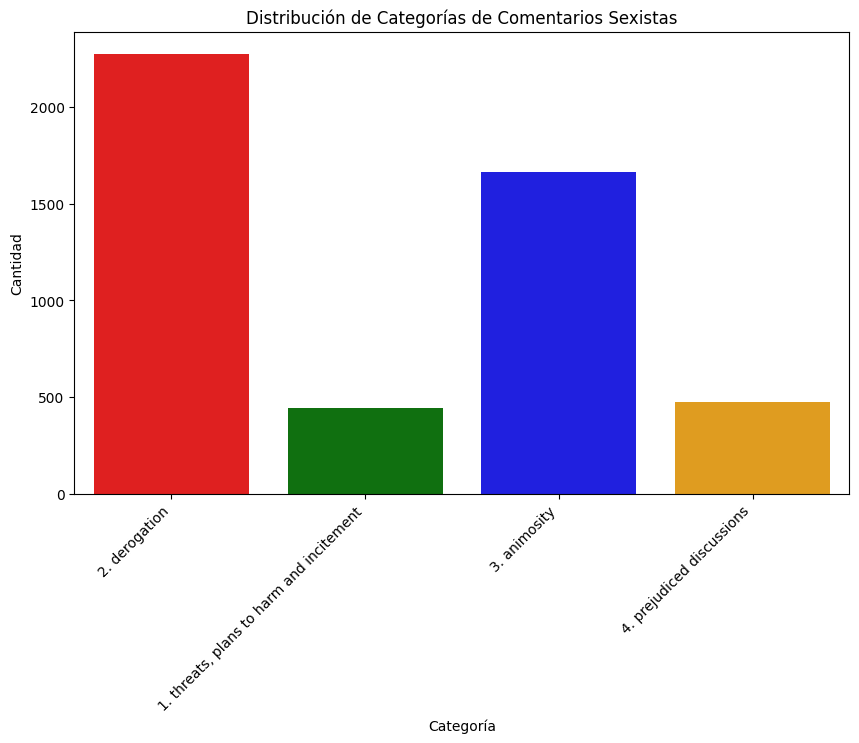

In [10]:
# Contar la frecuencia de cada categoría
category_counts = only_sexist['label_category'].value_counts()

# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.countplot(x='label_category', data=only_sexist, palette={'2. derogation': 'red', '1. threats, plans to harm and incitement': 'green', '3. animosity': 'blue',
                                                             '4. prejudiced discussions': 'orange'})
plt.title('Distribución de Categorías de Comentarios Sexistas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Observamos que los datos estan algo desbalanceados

## **Analisis exporatorio**

Lo que se hará en el siguiente analisis es tranformar los comentarios realizando las siguientes tareas:



Eliminar la preposiciones y pronombres de una lista de tokens que estaán en ingles.

In [11]:
def eliminar_prep_pron(tokens):
    # Obtener lista de stopwords en inglés
    stop_words = set(stopwords.words('english'))

    # Identificar y etiquetar las palabras con Part-Of-Speech (POS)
    tagged_tokens = pos_tag(tokens)

    # Filtrar los tokens que no son preposiciones (IN) ni pronombres (PRP o PRP$)
    tokens_filtrados = [
        token for token, tag in tagged_tokens
        if tag not in ('IN', 'PRP', 'PRP$') and token not in stop_words
    ]

    return tokens_filtrados

Función que limpia y tokeniza un comentario:


In [12]:
def limpiar_tokenizar(texto, eliminar_prep_pron):
    lemmatizer = WordNetLemmatizer() # Crear instancia del lematizador
    nuevo_texto = texto.lower() # conbertir a minusculas

    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    nuevo_texto = unidecode(nuevo_texto)
    nuevo_texto = re.sub("\d+/\d+", ' ', nuevo_texto)
    nuevo_texto = re.sub("\d{1,2}/\d{1,2}/\d{2,4}", ' ', nuevo_texto)
    nuevo_texto = nuevo_texto.split(sep=' ')
    nuevo_texto = eliminar_prep_pron(nuevo_texto)# Eliminar preposiciones, pronombres y stopWords
    nuevo_texto = [lemmatizer.lemmatize(token) for token in nuevo_texto]

    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]  # Eliminación de tokens con una longitud < 2

    return nuevo_texto

Esta función toma los valores de la columna 'text' del DataFrame 'only_sexist', los limpia y tokeniza utilizando la función 'limpiar_tokenizar', y luego asigna los resultados a la columna 'texto_tokenizado'

In [13]:
only_sexist['comentarios_tokenizados'] = only_sexist['text'].apply(lambda x: limpiar_tokenizar(x, eliminar_prep_pron))

only_sexist.head()

,text,label_category,comentarios_tokenizados
2,I agree with that but at the same time I know ...,2. derogation,"[agree, time, know, well, enough, say, can't, ..."
3,democrats from Minnesota (leftist muzzie shith...,2. derogation,"[democrat, minnesota, leftist, muzzie, shithol..."
7,aim for the head so she dosn't come back,"1. threats, plans to harm and incitement","[aim, head, dosn, come, back]"
9,This guys gonna have a great time in the barra...,3. animosity,"[guy, gonna, great, time, barrack, know, first..."
13,Or women can stop being lying whores.,2. derogation,"[woman, stop, lying, whore]"


Se ha decidido crear un grafico de nubes de palabras para identificar cuales son las que mas se repiten por categoria.

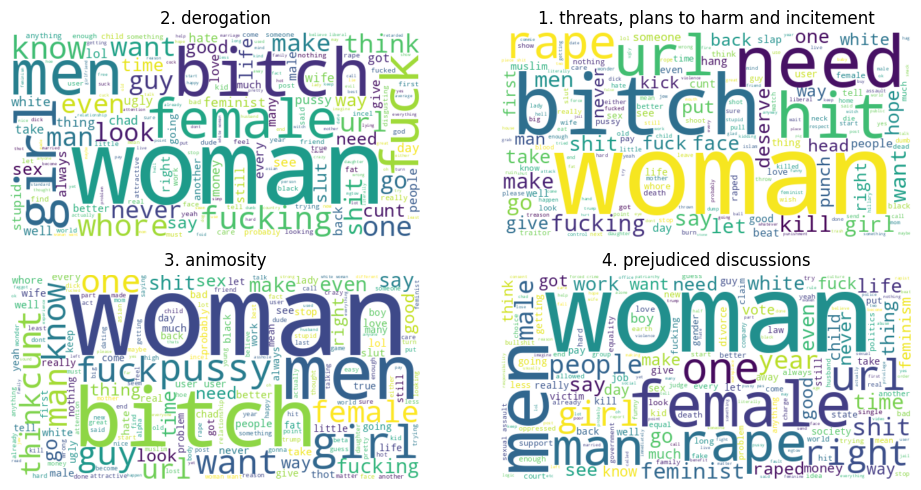

In [14]:
categorias = only_sexist['label_category'].unique()

plt.figure(figsize=(10, 5))

for i, categoria in enumerate(categorias):
    comentarios = ' '.join(only_sexist[only_sexist['label_category'] == categoria]['comentarios_tokenizados'].apply(lambda x: ' '.join(x)))

    wordcloud = WordCloud(width=600, height=300, background_color='white').generate(comentarios)

    plt.subplot(2, 2, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{categoria}')

plt.tight_layout()
plt.show()

Vamos observando a simple vista que la palabra que mas se repite es 'WOMAN'.

Ahora veamos mas precisamente la cantidad de palabras que hay por cada categoria:

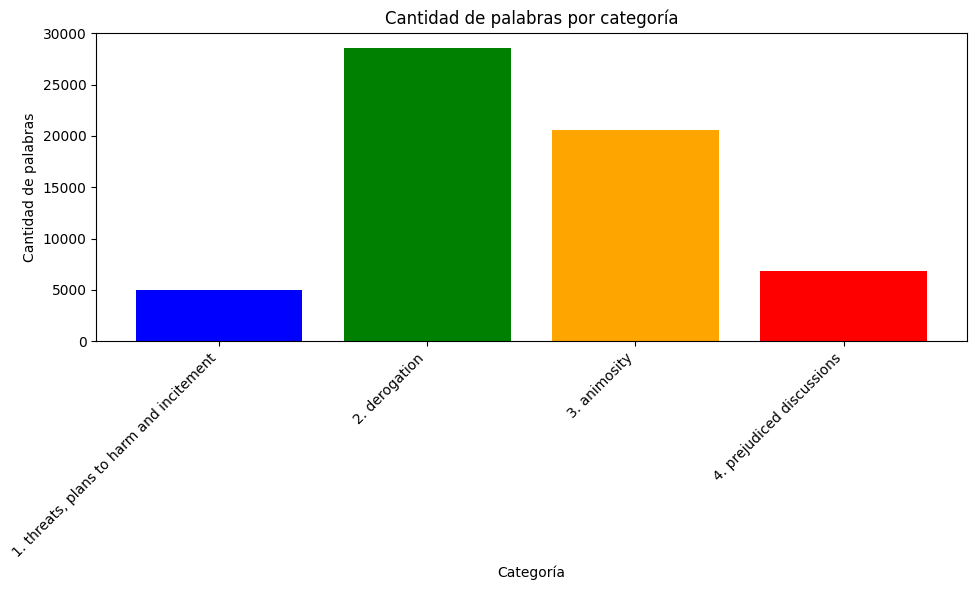

Cantidad de palabras por categoría:
label_category
1. threats, plans to harm and incitement     4986
2. derogation                               28615
3. animosity                                20610
4. prejudiced discussions                    6875
Name: comentarios_tokenizados, dtype: int64


In [15]:

num_palabras_categ = only_sexist.groupby('label_category')['comentarios_tokenizados'].apply(lambda x: x.apply(len).sum())

plt.figure(figsize=(10, 6))
plt.bar(num_palabras_categ.index, num_palabras_categ, color=['blue', 'green', 'orange', 'red'])

plt.title('Cantidad de palabras por categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de palabras')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

print("Cantidad de palabras por categoría:")
print(num_palabras_categ)

Tambien queremos saber cuantas palabras distintas hay por cada categoria.

In [16]:
palabras_unicas_por_categoria = only_sexist.groupby('label_category')['comentarios_tokenizados']\
    .apply(lambda x: set([word for sublist in x for word in sublist]))

print(palabras_unicas_por_categoria.apply(len))

label_category
1. threats, plans to harm and incitement    2133
2. derogation                               6185
3. animosity                                5334
4. prejudiced discussions                   2582
Name: comentarios_tokenizados, dtype: int64


Ahora lo que queremos analizar es cuantas palabras unicas son comunes entre categorias.

***Revisar grafico****

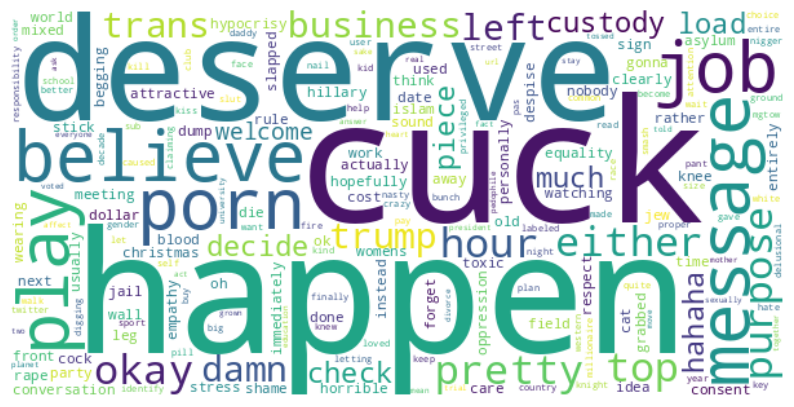

In [17]:
palabras_comunes = set.intersection(*palabras_unicas_por_categoria)

cadena = " ".join(palabras_comunes)

nube = WordCloud(width=600, height=300, background_color='white').generate(cadena)

plt.figure(figsize=(10, 6))
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Vectorización**

In [18]:
vectorizacion = CountVectorizer(min_df=0.005)
texto_vectorizado = vectorizacion.fit_transform(only_sexist['comentarios_tokenizados'].apply(lambda x: ' '.join(x)))

only_sexist['comentarios_tokenizados'] = only_sexist['comentarios_tokenizados'].apply(lambda x: ' '.join(x))

only_sexist.head(10)

,text,label_category,comentarios_tokenizados
2,I agree with that but at the same time I know ...,2. derogation,agree time know well enough say can't love wom...
3,democrats from Minnesota (leftist muzzie shith...,2. derogation,democrat minnesota leftist muzzie shithole dum...
7,aim for the head so she dosn't come back,"1. threats, plans to harm and incitement",aim head dosn come back
9,This guys gonna have a great time in the barra...,3. animosity,guy gonna great time barrack know first time t...
13,Or women can stop being lying whores.,2. derogation,woman stop lying whore
15,until she's been around me long enough through...,4. prejudiced discussions,long enough real life situation actually see r...
19,What a nasty bitch. I would’ve failed her on t...,4. prejudiced discussions,nasty bitch would've failed spot day pull much...
27,"Habits are hard to die, as much as the cock ca...",2. derogation,habit hard die much cock carousel rode life
36,I am with you on the False Accuser Registry. s...,"1. threats, plans to harm and incitement",false accuser registry deserve get raped empat...
39,"She’s unstable, you’ll never know when she mig...",2. derogation,unstable never know might dump cuck ugliest th...


In [19]:
only_sexist_text = pd.DataFrame(data=texto_vectorizado.toarray(), columns = vectorizacion.get_feature_names_out())
only_sexist_temp = only_sexist
only_sexist_temp.reset_index(drop=True, inplace=True)
only_sexist_text.reset_index(drop=True, inplace=True)

only_sexist_new = pd.concat([only_sexist_temp, only_sexist_text], axis=1)

only_sexist_new = pd.concat([only_sexist_temp, only_sexist_text], axis=1)
only_sexist_new.head(10)

,text,label_category,comentarios_tokenizados,act,actually,age,agree,allowed,almost,alone,...,world,worse,worst,would,wrong,yeah,year,yes,yet,young
0,I agree with that but at the same time I know ...,2. derogation,agree time know well enough say can't love wom...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,democrats from Minnesota (leftist muzzie shith...,2. derogation,democrat minnesota leftist muzzie shithole dum...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,aim for the head so she dosn't come back,"1. threats, plans to harm and incitement",aim head dosn come back,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,This guys gonna have a great time in the barra...,3. animosity,guy gonna great time barrack know first time t...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Or women can stop being lying whores.,2. derogation,woman stop lying whore,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,until she's been around me long enough through...,4. prejudiced discussions,long enough real life situation actually see r...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,What a nasty bitch. I would’ve failed her on t...,4. prejudiced discussions,nasty bitch would've failed spot day pull much...,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
7,"Habits are hard to die, as much as the cock ca...",2. derogation,habit hard die much cock carousel rode life,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,I am with you on the False Accuser Registry. s...,"1. threats, plans to harm and incitement",false accuser registry deserve get raped empat...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,"She’s unstable, you’ll never know when she mig...",2. derogation,unstable never know might dump cuck ugliest th...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
x = only_sexist_new[['label_category', 'comentarios_tokenizados']]  # Catacteristicas
X = vectorizacion.fit_transform(only_sexist_new['comentarios_tokenizados']) # caracteristicas
y = only_sexist_new['label_category']  # La columna a predecir

# Mostrar las dimensiones de X Y para verificación
print(X.shape)
print(y.shape)

(4854, 395)
(4854,)


Dividimos los datos en datos de entrenamiento y pruebas

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Modelos de implementación**

Buscamos una combinación de parametros adecuada aplicando 3 experimentos de combinación, haciendo uso de rejillas de parametros. Esto para cada modelo y asi quedarnos con el que nos de mejor resultado.

## Regresión logistica



1.   **Primer experimento**, combinacion de parametros arrojada: Mejores parámetros: {'C': 0.1, 'max_iter': 90} con un resultado de 49% con datos de prueba y 58% con datos de entrenamiento.
2.   Primer experimento, combinacion de parametros arrojada:



In [36]:
"""
#Experimento 1
param_grid = {
    'C': [0.1, 0.3, 0.4, 0.5],
    'max_iter': [90, 100, 150]
}
"""

#Experimento 2 actualmente estamos en este
param_grid = {
    'C': [1, 1.5, 2, 2.3, 2.4],
    'max_iter': [105, 95, 115]
}


"""
Experimento 3
param_grid = {
    'C': [2, 5, 10],
    'max_iter': [95, 130, 160]
}
"""

model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo ajustado
best_model = grid_search.best_estimator_

print("Mejores parámetros:", grid_search.best_params_)


#Predecir para los datos de entrenamiento
y_pred = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
train_f1_score = f1_score(y_train, y_pred, average='weighted')
report = classification_report(y_train, y_pred)

cmatrix = confusion_matrix(y_train, y_pred)
print()
print("Datos de entrenamiento")
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {train_f1_score}')
print("Matriz de confusión")
print(cmatrix)
print()
print(report)

print("-"*30)
#Predecir para los datos de prueba
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')
report_test = classification_report(y_test, y_pred_test)


cmatrix_test = confusion_matrix(y_test, y_pred_test)
print()
print(f'Accuracy: {accuracy_test}')
print(f'F1 Score: {test_f1_score}')
print("Matriz de confusión")
print(cmatrix_test)
print()
print(report_test)

Mejores parámetros: {'C': 1, 'max_iter': 105}

Datos de entrenamiento
Accuracy: 0.6379158080659405
F1 Score: 0.629366048881241
Matriz de confusión
[[ 142  121   49    8]
 [  31 1258  285   26]
 [  20  483  630   16]
 [  12  140   39  137]]

                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.69      0.44      0.54       320
                           2. derogation       0.63      0.79      0.70      1600
                            3. animosity       0.63      0.55      0.59      1149
               4. prejudiced discussions       0.73      0.42      0.53       328

                                accuracy                           0.64      3397
                               macro avg       0.67      0.55      0.59      3397
                            weighted avg       0.64      0.64      0.63      3397

------------------------------

Accuracy: 0.4838709677419355
F1 Score: 0.47270516445051414
Matriz de

## Arboles de decisión

1.   **Primer experimento**, combinacion de parametros arrojada: Mejores parámetros: Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 8} con un resultado de 46% con datos de prueba y 55% con datos de entrenamiento.
2.   Primer experimento, combinacion de parametros arrojada:

In [38]:
# Vectorización de los comentarios tokenizados
#X_train_vect = vectorizacion.fit_transform(X_train)
X_train_vect = X_train
#X_test_vect = vectorizacion.transform(X_test)
X_test_vect = X_test

Ahora seguimos en la busqueda de parametros adecuados que nos permitan adaptar y entrenar el modelo de la mejor forma,

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros: {'max_depth': 15, 'min_samples_leaf': 40, 'min_samples_split': 10}

Datos de entrenamiento
Accuracy: 0.5069178687076833
F1 Score 0.45097273074567745

Matriz de confusión
[[  18  233   69    0]
 [  16 1237  347    0]
 [   9  673  467    0]
 [   2  282   44    0]]
------------------------------
Datos de prueba
Accuracy: 0.4660260809883322
F1 Score 0.41517331921559614

Matriz de confusión
[[  9  88  26   0]
 [  7 487 177   0]
 [  5 328 183   0]
 [  4 125  18   0]]


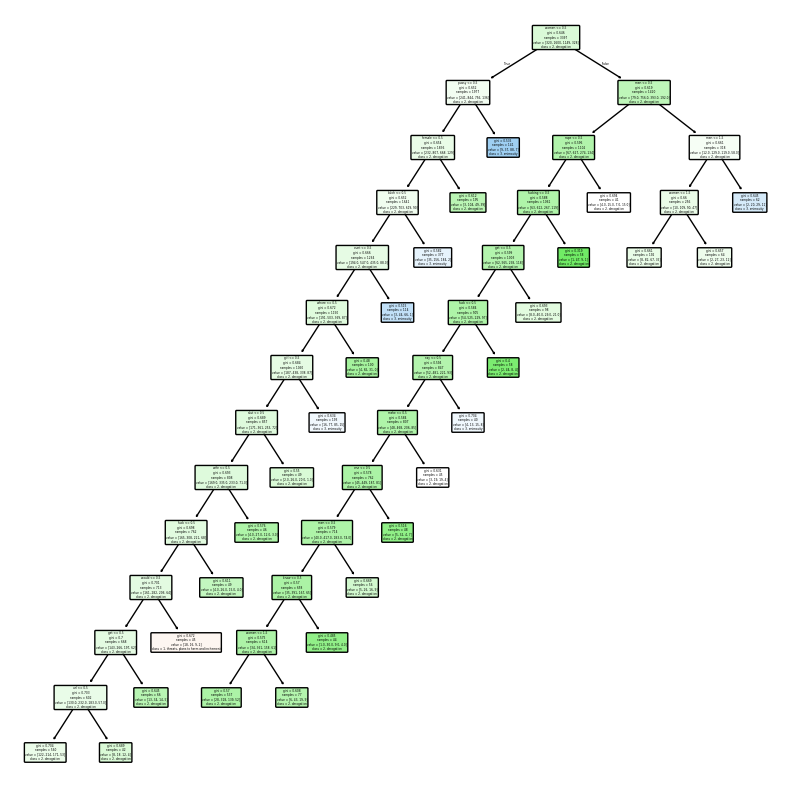

In [40]:

#Experimento 2
param_grid_tree_desc = {
    'max_depth': [15, 22, 40, 30],  # Profundidad máxima
    'min_samples_split': [10, 25, 30, 40],  # Mínimo de muestras para dividir
    'min_samples_leaf': [10, 25, 35, 40],  # Mínimo de muestras en una hoja
}

"""
#Experimento 1
param_grid_tree_desc = {
    'max_depth': [5, 10, 20, 50],  # Profundidad máxima
    'min_samples_split': [8, 15, 20],  # Mínimo de muestras para dividir
    'min_samples_leaf': [4, 50, 60, 70],  # Mínimo de muestras en una hoja
}
"""

"""
#Experimento 3
param_grid_tree_desc = {
    'max_depth': [45, 25, 17, 43],  # Profundidad máxima
    'min_samples_split': [12, 35],  # Mínimo de muestras para dividir
    'min_samples_leaf': [5, 14, 22],  # Mínimo de muestras en una hoja
}
"""

dtree = DecisionTreeClassifier()

grid_search_tree_dec = GridSearchCV(estimator=dtree, param_grid=param_grid_tree_desc, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_tree_dec.fit(X_train, y_train)

# Obtener el mejor estimador
best_tree = grid_search_tree_dec.best_estimator_

print("Mejores parámetros:", grid_search_tree_dec.best_params_)
print()



#Predecir para el conjunto de entrenamiento
print("Datos de entrenamiento")
y_train_pred_tree_desc = best_tree.predict(X_train_vect)
accuracy_train_tree_desc = accuracy_score(y_train, y_train_pred_tree_desc)
train_f1_score_tree_desc = f1_score(y_train, y_train_pred_tree_desc, average='weighted')

cmatrix_tree_desc = confusion_matrix(y_train, y_train_pred_tree_desc)
print(f'Accuracy: {accuracy_train_tree_desc}')
print(f'F1 Score {train_f1_score_tree_desc}')
print()
print("Matriz de confusión")
print(cmatrix_tree_desc)
print("-"*30)


#Predecir para el conjunto de pruebas
print("Datos de prueba")
y_test_pred_tree_desc = best_tree.predict(X_test_vect)
accuracy_test_tree_desc = accuracy_score(y_test, y_test_pred_tree_desc)
test_f1_score_tree_desc = f1_score(y_test, y_test_pred_tree_desc, average='weighted')

cmatrix_tree_desc = confusion_matrix(y_test, y_test_pred_tree_desc)
print(f'Accuracy: {accuracy_test_tree_desc}')
print(f'F1 Score {test_f1_score_tree_desc}')
print()
print("Matriz de confusión")
print(cmatrix_tree_desc)

plt.figure(figsize=(10, 10))
plot_tree(best_tree, filled=True, feature_names=vectorizacion.get_feature_names_out(), class_names=best_tree.classes_, rounded=True)
plt.show()

## Ramdon *forest*

1.   **Primer experimento**, combinacion de parametros arrojada: Mejores parámetros:Mejores hiperparámetros para DecisionTreeClassifier: {'bootstrap': False, 'max_depth': 500, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 300} con un resultado de 51% con datos de prueba y 70% con datos de entrenamiento.
2.   Primer experimento, combinacion de parametros arrojada:

In [ ]:

#Primer Experimento
param_grid_rf = {
    'n_estimators': [300],
    'max_depth': [500],
    'min_samples_split': [15],
    'min_samples_leaf' : [2, 4, 6],
    'bootstrap': [False]
}

"""
#Segundo Experimento
param_grid_rf = {
    'n_estimators': [300, 100, 150],
    'max_depth': [50, 10, 30],
    'min_samples_split': [20, 15, 10],
    'min_samples_leaf' : [2, 3, 5],
    'bootstrap': [False]
} """

"""
#Tercer Experimento
param_grid_rf = {
    'n_estimators': [400, 200, 90],
    'max_depth': [10, 40, 20],
    'min_samples_split': [9, 11, 25],
    'min_samples_leaf' : [1, 7, 8],
    'bootstrap': [False]
} """


tree = RandomForestClassifier()

# Aplicar Grid Search con validación cruzada
grid_search_tree = GridSearchCV(tree, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_tree.fit(X_train, y_train)

# Obtener el mejor estimador
best_rf = grid_search_tree.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)


# Calcular precisión para el conjunto de entrenamiento
print("Datos de entrenamiento")
print()
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_f1_tree = f1_score(y_train, y_train_pred_rf, average='weighted')
print(f'Accuracy: {train_accuracy_rf }')
print(f'F1 Score: {train_f1_tree}')
print("\nClassification Report:\n", classification_report(y_train, y_train_pred_rf))
cm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
print()
print("Matriz de confusión para los datos de entrenamiento:\n", cm_train_rf)

print("-"*30)
print()

# Calcular precisión y otras métricas para el conjunto de prueba
print("Datos de prueba")
print()
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_f1_tree = f1_score(y_test, y_test_pred_rf, average='weighted')
print(f'Accuracy: {test_accuracy_rf}')
print(f'F1 Score: {test_f1_tree}')
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rf))
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
print()
print("Matriz de confusión para los datos de prueba:\n", cm_test_rf)


# Mostrar los mejores parámetros
print("Mejores hiperparámetros para DecisionTreeClassifier:", grid_search_tree.best_params_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Datos de entrenamiento

Accuracy: 0.7017957020900795
F1 Score: 0.674646541984314

Classification Report:
                                           precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.82      0.28      0.42       320
                           2. derogation       0.67      0.91      0.77      1600
                            3. animosity       0.76      0.66      0.71      1149
               4. prejudiced discussions       0.75      0.22      0.34       328

                                accuracy                           0.70      3397
                               macro avg       0.75      0.52      0.56      3397
                            weighted avg       0.72      0.70      0.67      3397


Matriz de confusión para los datos de entrenamiento:
 [[  89  162   58   11]
 [   6 1463  127    4]
 [   8  372  760    9]
 [   5  202   49   72]]
---------------------------

## Perceptron

Primer experimento, combinacion de parametros arrojada: Mejores parámetros: Mejores hiperparámetros para MLP: <<<'hidden_layer_sizes' : [(200,100)],
    'max_iter':[5000],
    'alpha': [0.01],
    'solver': ['adam']>>> con un resultado de 48% con datos de prueba y 98% con datos de entrenamiento.
Primer experimento, combinacion de parametros arrojada:


In [ ]:
param_grid_MLP = {
    'hidden_layer_sizes' : [(8,9,10), (2,5,4), (3,5), (5,5)],
    'max_iter':[1600, 2100, 5000],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'solver': ['adam']
}

"""
#Experimetno 2
param_grid_MLP = {
    'hidden_layer_sizes' : [(5,5), (6,5), (6,7)],
    'max_iter':[2000],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}
"""

model_MLP = MLPClassifier()
grid_search_MLP = GridSearchCV(model_MLP, param_grid_MLP, cv=5, scoring='accuracy')
grid_search_MLP.fit(X_train, y_train)

print(grid_search_MLP.best_params_)

train_pred_MLP = grid_search_MLP.predict(X_train)
test_pred_MLP = grid_search_MLP.predict(X_test)


print("Datos de entrenamiento")
print(accuracy_score(y_train, train_pred_MLP))
cm_MLP_train = confusion_matrix(y_train, train_pred_MLP)
print(f'Confusion matrix: {cm_MLP_train}')

print("-"*30)
print()

print("Datos de prueba")
print(accuracy_score(y_test, test_pred_MLP))
cm_MLP_test = confusion_matrix(y_test, test_pred_MLP)
print(f'Confusion matrix: {cm_MLP_test}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  warnings.warn(


{'alpha': 0.1, 'hidden_layer_sizes': (3, 5), 'max_iter': 5000, 'solver': 'adam'}
Datos de entrenamiento
0.7023844568737121
Confusion matrix: [[  58  125   75   62]
 [  26 1265  252   57]
 [   1  236  881   31]
 [  26   86   34  182]]
------------------------------

Datos de prueba
0.4543582704186685
Confusion matrix: [[ 12  41  42  28]
 [ 12 381 220  58]
 [  9 251 224  32]
 [ 13  64  25  45]]


# **Conclusiones**